In [2]:
import scipy.io
import time
import os
import numpy as np

import matplotlib.pyplot as plt
from merged import MyApp
import cv2




In [8]:
app = MyApp(task='', run_flag= 0)

Known pipe types:
  glxGraphicsPipe
(1 aux display modules not yet loaded.)


In [ ]:

pos_ls = np.load('/home/mker/yanbo_code/trj/postion_ls.npy')
img_ls = np.load('/home/mker/yanbo_code/trj/image_ls.npy')
u_ls = np.load('/home/mker/yanbo_code/trj/u_ls.npy')


(110, 110, 110)

In [50]:
pos_ls = np.load('lipt_test_line/c14/deg270/samegrid/pos_ls.npy')
img_ls = np.load('lipt_test_line/c14/deg270/samegrid/img_ls.npy')
u_ls = np.load('lipt_test_line/c14/deg270/samegrid/u_ls.npy')
nr_ls = np.load('lipt_test_line/c14/deg270/samegrid/nr_ls.npy')

In [ ]:
dir = 'lipt_test_line/c14/deg270/samegrid/data'


In [116]:
dir = 'lipt_test_line/c14/deg270/samegrid/data'
os.makedirs(dir, exist_ok=True)
for i in range(len(nr_ls)):
    x, y = pos_ls[i][0], pos_ls[i][1]
    hd =270
    file_name = (
                'matx' + f"{x:.2f}" +
                '_y' + f"{y:.2f}" +
                '_HD' + f"{hd:.2f}"
                )
    
    dir = 'lipt_test_line/c14/deg270/samegrid/data'
    file_name = os.path.join(dir, file_name)
    np.save(file_name, nr_ls[i])

In [88]:
def load_dataset(cell_id,hd,x_pos,y_pos):
    dir_controller = 'cells_controllers/c'+str(cell_id)+'/deg'+str(hd) 
    # Directory containing the MATLAB files
    directory = 'cells_kernels/c'+str(cell_id)+'/deg'+str(hd) 
    dir_img = 'cells_kernels_images/c'+str(cell_id)+'/deg'+str(hd)
    # Define the controller parameter k
    K = np.load(os.path.join(dir_controller,'K.npy'))  # Adjust this based on your controller

    Kb = np.load(os.path.join(dir_controller,'Kb.npy'))


    # Lists to hold the positions and control inputs
 
    from gen_controller import cell, Control_cal
    # Regular expression to extract the x and y values from filenames
    filename  =  'matx'+str(x_pos)+'_y'+str(y_pos)+'_HD'+str(hd)+'.00.npy'
    imgfile = 'imgx'+str(x_pos)+'_y'+str(y_pos)+'_HD'+str(hd)+'.00.png'
    # filename_pattern = r'matx([-+]?\d*\.\d+|\d+)_y([-+]?\d*\.\d+|\d+)_.*\.mat'
    file_path = os.path.join(directory, filename)
    img_path = os.path.join(dir_img, imgfile)
    S_new = np.load(file_path)
    u = K@S_new+Kb
    import matplotlib.image as mpimg


    from PIL import Image

    # Load image using PIL
    img = Image.open(img_path) # Replace with your file path

    # Convert to grayscale
    img = img.convert('L')  # 'L' mode converts to 8-bit grayscale (0-255)

    # Convert to NumPy array and normalize to [0, 1]
    img = np.array(img) / 255.0  # Normalize pixel values
    return img, S_new

In [91]:
img.shape

(90, 150)

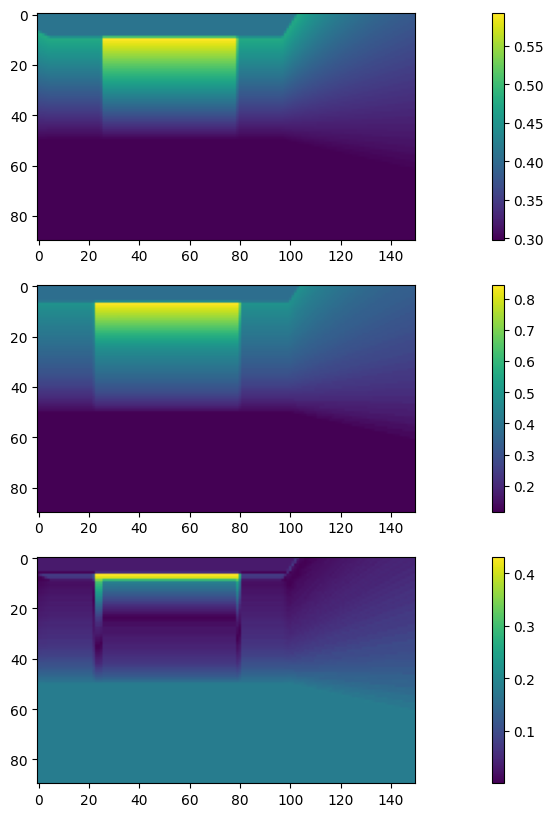

In [109]:
###check with the dataset
x_pos , y_pos = 0.29, 0.25
idx = np.where((pos_ls[:,0] == x_pos) & (pos_ls[:,1] == y_pos))
idx = idx[0][0]

img, nr = load_dataset(14,270,0.29,0.25)
fig, ax = plt.subplots(3,figsize=(20,10))
im1_display = ax[0].imshow(img_ls[idx])
im2_display= ax[1].imshow(img)
diff_display = ax[2].imshow(np.abs(img_ls[idx]-img))

fig.colorbar(im1_display, ax=ax[0], orientation='vertical')
fig.colorbar(im2_display, ax=ax[1], orientation='vertical')
fig.colorbar(diff_display, ax=ax[2], orientation='vertical')

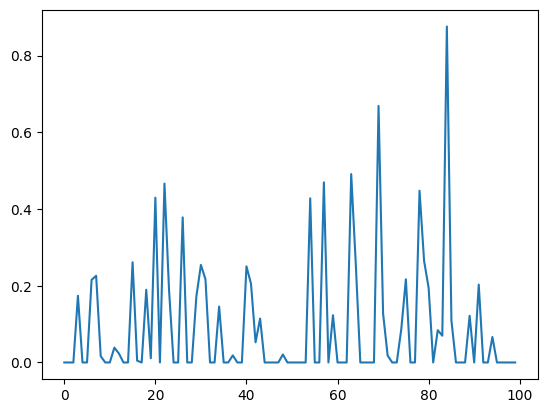

In [112]:
plt.plot(np.abs(nr_ls[idx]- nr))


In [ ]:
x = 0.01
im_all =np.load('trj/c3_230/image_ls.npy')
nr_ls1 = []
nr_ls2 = []
u_ls1 = []
u_ls2 = []
for y in np.arange(0.01,0.29,0.01):
    im1 = np.load('cells_kernels_images\\c3\\deg230\\matx'+"{:.2f}".format(x)+'_y'+"{:.2f}".format(y)+'_HD230.00.npy')
    ind = int((y-0.01)/0.01)
    im2 = im_all[ind]
    nr1 =  np.array(app.gen_NeuralRate(im1))
    nr2 =  np.array(app.gen_NeuralRate(im2))
    position = np.array([x,y])
    orientation = 230
    u1 = app.controller(nr1, position, orientation)
    u2 = app.controller(nr2, position, orientation)
    nr_ls1.append(nr1)
    nr_ls2.append(nr2)
    u_ls1.append(u1)
    u_ls2.append(u2)

u_ls1 = np.array(u_ls1)
u_ls2 = np.array(u_ls2)
nr_ls1 = np.array(nr_ls1)
nr_ls2 = np.array(nr_ls2)   
(u_ls1-u_ls2)[:,:,0].shape




u= [[5.        ]
 [1.52712273]]
u_norm= [[0.95638658]
 [0.29210394]]
u= [[5.]
 [5.]]
u_norm= [[0.70710678]
 [0.70710678]]
u= [[5.81216419]
 [4.99821022]]
u_norm= [[0.75820138]
 [0.65202045]]
u= [[5.81216419]
 [4.99821022]]
u_norm= [[0.75820138]
 [0.65202045]]
u= [[5.36868424]
 [4.30910324]]
u_norm= [[0.77986473]
 [0.62594809]]
u= [[5.81216419]
 [4.99821022]]
u_norm= [[0.75820138]
 [0.65202045]]
u= [[5.84350136]
 [4.93552557]]
u_norm= [[0.76396461]
 [0.64525815]]
u= [[5.46551388]
 [3.90072183]]
u_norm= [[0.81395998]
 [0.58092094]]
u= [[5.3131429 ]
 [3.61953524]]
u_norm= [[0.82644898]
 [0.56301162]]
u= [[5.3131429 ]
 [3.61953524]]
u_norm= [[0.82644898]
 [0.56301162]]
u= [[5.28259327]
 [3.78642568]]
u_norm= [[0.81277581]
 [0.58257659]]
u= [[5.28259327]
 [3.78642568]]
u_norm= [[0.81277581]
 [0.58257659]]
u= [[5.30637471]
 [3.62480483]]
u_norm= [[0.82573291]
 [0.56406131]]
u= [[5.28259327]
 [3.78642568]]
u_norm= [[0.81277581]
 [0.58257659]]
u= [[5.17916745]
 [3.67268091]]
u_norm= [[0.815719

IndexError: index 28 is out of bounds for axis 0 with size 28

In [ ]:
diff_u_ls = (u_ls1-u_ls2)[:,0,0]**2+(u_ls1-u_ls2)[:,1,0]**2
arg = np.argmax(diff_u_ls[1:])+1
u_ls1[arg], u_ls2[arg]
diff = np.abs(nr_ls1[arg]- nr_ls2[arg])
fig, ax = plt.subplots(4, figsize=(8,10))
ax[0].plot(nr_ls1[arg])
ax[0].set_title('nr_ls1')
ax[0].set_ylim([0, 1.5])
ax[1].plot(nr_ls2[arg])
ax[1].set_title('nr_ls2')
ax[1].set_ylim([0, 1.5])
ax[2].plot(diff)
ax[2].set_title('diff')

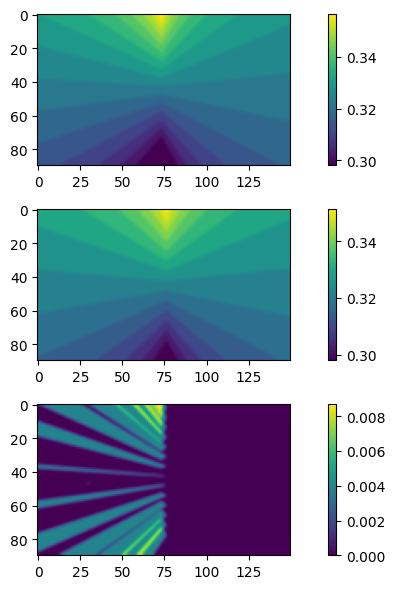

In [5]:
x = 0.01
y = 0.03
im1 = np.load('cells_kernels_images\\c3\\deg230\\matx'+"{:.2f}".format(x)+'_y'+"{:.2f}".format(y)+'_HD230.00.npy')
im_all =np.load('trj/c3_230/image_ls.npy')
ind = int((y-0.01)/0.01)
im2 = im_all[ind]
# im2 = cv2.resize(im2/255, (150, 90), interpolation=cv2.INTER_AREA)
ks = 3
m =0
diff =np.abs( im1- im2)

fig, ax = plt.subplots(3, figsize=(8, 6))

# Display images on each axis
im1_display = ax[0].imshow(im1)
im2_display = ax[1].imshow(im2)
diff_display = ax[2].imshow(diff)


# Add colorbars for each axis
fig.colorbar(im1_display, ax=ax[0], orientation='vertical')
fig.colorbar(im2_display, ax=ax[1], orientation='vertical')
fig.colorbar(diff_display, ax=ax[2], orientation='vertical')

plt.tight_layout()
plt.show()



In [8]:
v1_1 = np.array(app.gen_NeuralRate(im1))
v1_2 = np.array(app.gen_NeuralRate(im2))
np.max(np.abs(v1_1-v1_2))
position = np.array([x,y])
orientation = 230
u1 = app.controller(v1_1, position, orientation)
u2 = app.controller(v1_2, position, orientation)


u= [[5.23429008]
 [4.30910324]]
u_norm= [[5.23429008]
 [4.30910324]]
u= [[5.52913889]
 [4.99821022]]
u_norm= [[5.52913889]
 [4.99821022]]
[[0.08845464]
 [0.20673209]]


In [9]:
print(np.abs(u1-u2))

[[0.08845464]
 [0.20673209]]


In [12]:
u1,u2

(array([[1.57028702],
        [1.29273097]]),
 array([[1.65874167],
        [1.49946306]]))

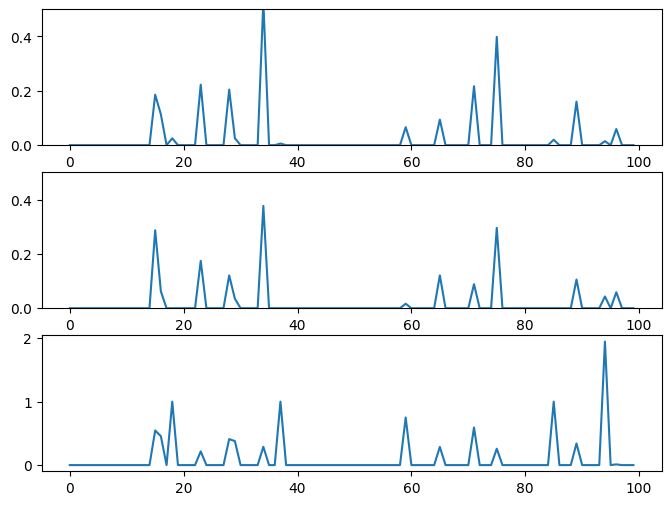

In [14]:
diff_v = np.abs(v1_1-v1_2)
### deep copy of the vector
diff_norm = np.copy(diff_v)
for i in range(0, len(diff_v)):
    if diff_v[i] > 0:
        diff_norm[i] = diff_v[i]/v1_1[i]

fig, ax = plt.subplots(3, figsize=(8, 6))
ax[0].plot(v1_1)
ax[0].set_ylim([0, 0.5])
ax[1].plot(v1_2)
ax[1].set_ylim([0, 0.5])
ax[2].plot(diff_norm)

In [11]:


# fig, ax = plt.subplots(3, figsize=(8, 6))

# # Display images on each axis
# im1_display = ax[0].imshow(im1)
# im2_display = ax[1].imshow(im2)
# diff_display = ax[2].imshow(diff)

# # Add colorbars for each axis
# fig.colorbar(im1_display, ax=ax[0], orientation='vertical')
# fig.colorbar(im2_display, ax=ax[1], orientation='vertical')
# fig.colorbar(diff_display, ax=ax[2], orientation='vertical')

# plt.tight_layout()
# plt.show()


In [15]:
K = np.load('cells_controllers\c3\deg230\K.npy')


[[2.07806971]
 [0.72223699]] 
 [[ 1.67663629]
 [-1.42439136]]


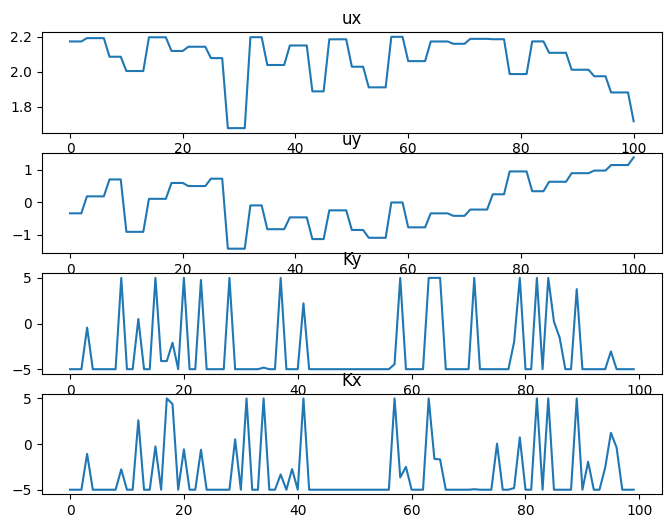

In [17]:
### Evaluate lipt_test_line
img_ls230 = np.load('lipt_test_line\c3\deg230\img_ls.npy')
pos230 = np.load('lipt_test_line\c3\deg230\pos_ls.npy')
u_ls230 = np.load('lipt_test_line/c3/deg230/u_ls.npy')
nr_ls230 = np.load('lipt_test_line/c3/deg230/nr_ls.npy')
fig, ax = plt.subplots(4, figsize=(8, 6))
ax[0].plot(u_ls230[:,0])
ax[1].plot(u_ls230[:,1])
ax[0].set_title('ux')
ax[1].set_title('uy')
ax[2].set_title('Ky')

print(u_ls230[27],'\n',u_ls230[28])

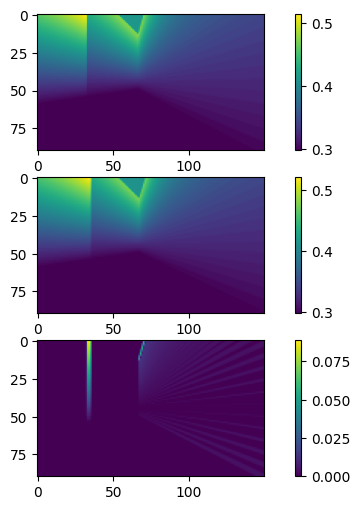

In [57]:
fig, ax = plt.subplots(3, figsize=(8, 6))
im1_display=ax[0].imshow(img_ls230[27])
im2_display=ax[1].imshow(img_ls230[28])
diff_display=ax[2].imshow(np.abs(img_ls230[27]-img_ls230[28]))

fig.colorbar(im1_display, ax=ax[0], orientation='vertical')
fig.colorbar(im2_display, ax=ax[1], orientation='vertical')
fig.colorbar(diff_display, ax=ax[2], orientation='vertical')

C:\Users\mahdi\AppData\Local\Temp\ipykernel_31864\2999512794.py:5: RuntimeWarning: divide by zero encountered in divide
  norm_diff = np.abs(nr_ls230[27]-nr_ls230[28])/np.abs(nr_ls230[27])
C:\Users\mahdi\AppData\Local\Temp\ipykernel_31864\2999512794.py:5: RuntimeWarning: invalid value encountered in divide
  norm_diff = np.abs(nr_ls230[27]-nr_ls230[28])/np.abs(nr_ls230[27])


0.6470518


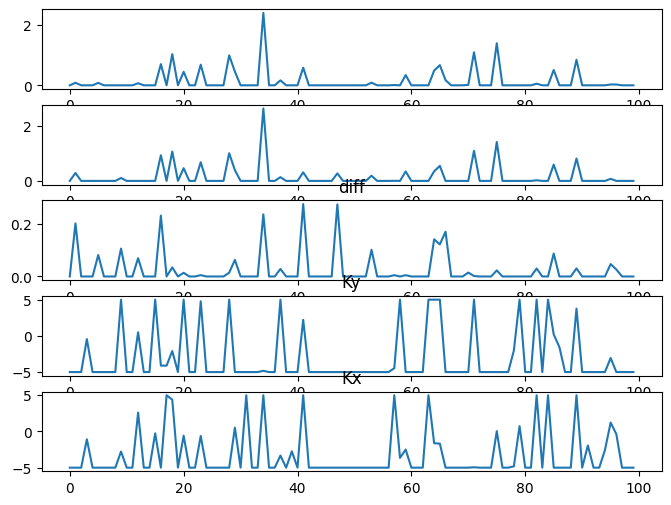

In [20]:
fig, ax = plt.subplots(5, figsize=(8, 6))
ax[0].plot(nr_ls230[27])
ax[1].plot(nr_ls230[28])
diff = np.abs(nr_ls230[27]-nr_ls230[28])
norm_diff = np.abs(nr_ls230[27]-nr_ls230[28])/np.abs(nr_ls230[27])
norm_diff[np.isnan(norm_diff)] = 0
ax[2].plot(np.abs(nr_ls230[27]-nr_ls230[28]))
ax[2].set_title('diff')
ax[3].plot(K[1,:])
ax[3].set_title('Ky')
ax[4].set_title('Kx')
ax[4].plot(K[0,:])
print(np.linalg.norm(nr_ls230[27]-nr_ls230[28]))

In [76]:
np.argmax(diff)

np.int64(41)

In [66]:
np.abs(nr_ls230[28])[9]

array([0.10617889], dtype=float32)

im1 = np.load('cells_kernels_images/c2/deg0/matx0.01_y0.50_HD0.00.npy')
im2 = np.load('trj/image_ls.npy')[-1]

In [ ]:
fig, ax = plt.subplots(3, figsize = (10,12))
ax[0].imshow(im1,vmin =0, vmax =  1)
ax[1].imshow(im2)
ax[2].imshow(np.abs(im1-im2))


In [ ]:
len(np.where(im1*255-im2 != 0)[0])

In [ ]:
np.max(np.abs(im1*255-im2))

In [41]:
nr_train = np.load('cells_kernels\\c3\\deg230\\matx0.29_y0.29_HD230.00.npy').flatten()
nr_imp = np.load('trj/ratemap_ls.npy')[-1].flatten()

In [ ]:

nr_train_gen = np.array(app.gen_NeuralRate(im1)).flatten()
nr_imp_gen = np.array(app.gen_NeuralRate(im2/255)).flatten()
print(nr_imp_gen-nr_imp)
print(nr_train_gen-nr_train_gen)

In [ ]:
###Check resolution change

img_res0 = np.load('trj/image_ls_res90,150_pos0.13,1.1_hd270.npy')[-1]
img_res1 = np.load('trj/image_ls_res99,165_pos0.13,1.1_hd270.npy')[-1]
img_res2 = np.load('trj/image_ls_res180,300_pos0.13,1.1_hd270.npy')[-1]
img_res3 = np.load('trj/image_ls.npy')[-1]
im4 = cv2.resize(img_res3, (150, 90), interpolation=cv2.INTER_AREA)


fig, ax = plt.subplots(5, figsize = (8,10))
ax[0].imshow(img_res0)
ax[1].imshow(img_res1)
ax[2].imshow(img_res2)
ax[3].imshow(img_res3)
ax[4].imshow(im4)


In [ ]:
###ploting trj and hd
hd_ls = np.load('trj/hd_ls0.npy')
pos_ls = np.load('trj/postion_ls0.npy')
u_ls = np.load('trj/u_ls.npy')
img_ls = np.load('trj/image_ls0.npy')
nr_ls = np.load('trj/ratemap_ls0.npy')
fig, ax = plt.subplots(3, figsize= (8,10))
ax[0].plot(hd_ls)
ax[1].plot(pos_ls[:,0])
ax[2].plot(pos_ls[:,1])


In [ ]:
np.max(np.abs(nr_ls[id]-np.load('trj/nr0.npy')))

In [ ]:
id = 125
print( [pos_ls[id-1][0], pos_ls[id-1][1]], hd_ls[id-1])

In [ ]:
id = 100
print(app.controller(nr_ls[id], [pos_ls[id-1][0], pos_ls[id-1][1]], hd_ls[id-1]))
print(u_ls[id])

In [ ]:
id = 52
hd_ls[id], pos_ls[id], u_ls[id]

In [ ]:
hd_ls[id], pos_ls[id+1]

In [ ]:
app.controller(nr_ls[id], [pos_ls[id][0], pos_ls[id][1]], hd_ls[id])

In [ ]:
app.u_ls = []
app.update_state(nr_ls[id], [pos_ls[id][0], pos_ls[id][1]], hd_ls[id])

In [ ]:


# img = app.gen_images_from_pos(np.array([pos_ls[id][0], pos_ls[id][1]]), hd_ls[id])
img = img_ls[id]
NeuralRate = app.gen_NeuralRate(img)


app.update_state(NeuralRate, [pos_ls[id][0], pos_ls[id][1]], hd_ls[id])

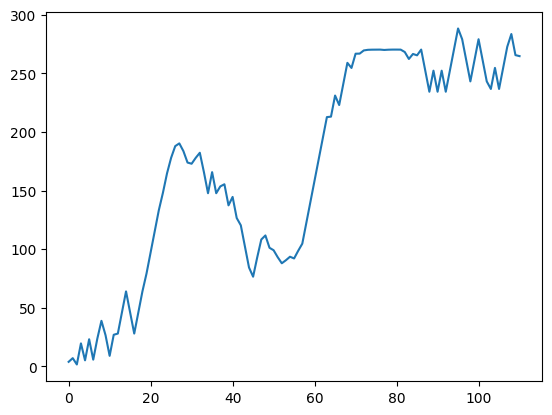

In [3]:
hd_ls = np.load('trj/hd_ls.npy')
plt.plot(hd_ls)

In [10]:
pos_ls = np.load('lipt_test_line/c5/deg180/pos_ls.npy')
img_ls = np.load('lipt_test_line/c5/deg180/img_ls.npy')
u_ls = np.load('lipt_test_line/c5/deg180/u_ls.npy')
nr_ls = np.load('lipt_test_line/c5/deg180/nr_ls.npy')

In [11]:
len(pos_ls), len(img_ls), len(u_ls), len(nr_ls)

(50, 50, 50, 50)

In [14]:
pos_ls[-1]

array([0.14, 0.44])

In [19]:
dir = 'lipt_test_line/c5/deg180/img'
os.makedirs(dir, exist_ok=True)
for i in range(len(img_ls)):
    x, y = pos_ls[i][0], pos_ls[i][1]
    hd = 180
    file_name = ('id'+str(i)+
                'x' + f"{x:.2f}" +
                '_y' + f"{y:.2f}" +
                '_HD' + f"{hd:.2f}"
                )
    
    dir = 'lipt_test_line/c5/deg180/img'
    file_name = os.path.join(dir, file_name)
    plt.imsave(file_name+'.png', img_ls[i])